In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
################### READ IN THE DATASET FIRST #########################
df = pd.read_csv('./local_data/TB_Burden_Country.csv')
print(df.columns)
print(df.shape)

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [3]:
################## Identify Columns needed and which to drop #########################
#analyze in excel if possible
#identify columns to keep based on business objective
#Objective --> identify which countries have a high prevelence of turberculosis cases and which have higher death rates



columns_keep = [
    'Country or territory name',
    'ISO 3-character country/territory code',
    'Region',
    'Year',
    'Estimated total population number',
    'Estimated prevalence of TB (all forms)',
    'Method to derive prevalence estimates',
    'Estimated number of deaths from TB (all forms, excluding HIV)',
    'Estimated number of deaths from TB in people who are HIV-positive',
    'Method to derive mortality estimates',
    'Estimated number of incident cases (all forms)'
]

df = df[columns_keep]
print(df.shape)

(5120, 11)


In [4]:
# Continue to clean up dataset prior to feature engineering and wrangling
#dic_list = {}
col_mapping = {
    'Country or territory name': 'country',
    'ISO 3-character country/territory code': 'country_code',
    'Region': 'region',
    'Year': 'year',
    'Estimated total population number': 'population',
    'Estimated prevalence of TB (all forms)': 'tb_prevalence_all_forms',
    'Method to derive prevalence estimates': 'prevalence_method',
    'Estimated number of deaths from TB (all forms, excluding HIV)': 'tb_deaths_exc_hiv',
    'Estimated number of deaths from TB in people who are HIV-positive': 'tb_death_hiv',
    'Method to derive mortality estimates': 'mortality_method',
    'Estimated number of incident cases (all forms)': 'num_incidents_all_forms'
}
df.rename(columns=col_mapping, inplace=True)

In [5]:
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms
0,Afghanistan,AFG,EMR,1990,11731193,36000.0,predicted,4300.0,5.0,Indirect,22000.0
1,Afghanistan,AFG,EMR,1991,12612043,43000.0,predicted,5800.0,8.0,Indirect,24000.0
2,Afghanistan,AFG,EMR,1992,13811876,51000.0,predicted,7400.0,11.0,Indirect,26000.0
3,Afghanistan,AFG,EMR,1993,15175325,59000.0,predicted,9100.0,17.0,Indirect,29000.0
4,Afghanistan,AFG,EMR,1994,16485018,68000.0,predicted,11000.0,22.0,Indirect,31000.0
...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,2009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0
5116,Zimbabwe,ZWE,AFR,2010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0
5117,Zimbabwe,ZWE,AFR,2011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0
5118,Zimbabwe,ZWE,AFR,2012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0


In [6]:
#df.reset_index(inplace=True)
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms
0,Afghanistan,AFG,EMR,1990,11731193,36000.0,predicted,4300.0,5.0,Indirect,22000.0
1,Afghanistan,AFG,EMR,1991,12612043,43000.0,predicted,5800.0,8.0,Indirect,24000.0
2,Afghanistan,AFG,EMR,1992,13811876,51000.0,predicted,7400.0,11.0,Indirect,26000.0
3,Afghanistan,AFG,EMR,1993,15175325,59000.0,predicted,9100.0,17.0,Indirect,29000.0
4,Afghanistan,AFG,EMR,1994,16485018,68000.0,predicted,11000.0,22.0,Indirect,31000.0
...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,2009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0
5116,Zimbabwe,ZWE,AFR,2010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0
5117,Zimbabwe,ZWE,AFR,2011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0
5118,Zimbabwe,ZWE,AFR,2012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0


In [7]:
##### Remove any duplicate rows #######
unique_list = df.duplicated(keep=False)
unique_list

0       False
1       False
2       False
3       False
4       False
        ...  
5115    False
5116    False
5117    False
5118    False
5119    False
Length: 5120, dtype: bool

In [8]:
df[df.duplicated(keep=False)]  #applied keeping all unique values only to df
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms
0,Afghanistan,AFG,EMR,1990,11731193,36000.0,predicted,4300.0,5.0,Indirect,22000.0
1,Afghanistan,AFG,EMR,1991,12612043,43000.0,predicted,5800.0,8.0,Indirect,24000.0
2,Afghanistan,AFG,EMR,1992,13811876,51000.0,predicted,7400.0,11.0,Indirect,26000.0
3,Afghanistan,AFG,EMR,1993,15175325,59000.0,predicted,9100.0,17.0,Indirect,29000.0
4,Afghanistan,AFG,EMR,1994,16485018,68000.0,predicted,11000.0,22.0,Indirect,31000.0
...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,2009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0
5116,Zimbabwe,ZWE,AFR,2010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0
5117,Zimbabwe,ZWE,AFR,2011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0
5118,Zimbabwe,ZWE,AFR,2012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0


In [9]:
##### Remove any rows/columns with missing values - Nulls (if any) #######
df.isnull().sum() #there are no missing values in our dataset

country                    0
country_code               0
region                     0
year                       0
population                 0
tb_prevalence_all_forms    0
prevalence_method          0
tb_deaths_exc_hiv          0
tb_death_hiv               0
mortality_method           0
num_incidents_all_forms    0
dtype: int64

In [34]:
######## Remove any outliers (if any) ##########
#first I need to group data by country (collapse dates) or select one record per country to analyze



In [10]:
df.describe()

,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms
count,5120.000000,5.120000e+03,5.120000e+03,5120.000000,5120.000000,5.120000e+03
mean,2001.549023,2.915671e+07,6.654332e+04,6863.985914,1798.730236,4.218835e+04
std,6.933272,1.183725e+08,3.249488e+05,30554.560700,7915.691847,1.865701e+05
min,1990.000000,1.129000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1996.000000,5.601190e+05,3.800000e+02,18.000000,0.000000,2.600000e+02
50%,2002.000000,5.172118e+06,4.300000e+03,280.000000,6.500000,3.100000e+03
75%,2008.000000,1.752404e+07,2.700000e+04,2200.000000,270.000000,1.800000e+04
max,2013.000000,1.385567e+09,4.600000e+06,420000.000000,96000.000000,2.400000e+06


In [13]:
# First convert the year column to datetime format
df['year'] = pd.to_datetime(df['year']) #--> converted existing column

# Group by country and get maximum date for each country (new df created)
max_dates = df.groupby('country')['year'].max().reset_index()  #--> this is a new dataframe
print(type(max_dates))
print('this is our series', max_dates)
max_dates  # this is a pandas series NOT dataframe

## Finally create the new column based on this mapping
df['max_date'] = df.apply(lambda row: row['year'] == max_dates[max_dates['country'] == row['country']]['year'].values[0], axis=1)


<class 'pandas.core.frame.DataFrame'>
this is our series                        country                          year
0                  Afghanistan 1970-01-01 00:00:00.000002013
1                      Albania 1970-01-01 00:00:00.000002013
2                      Algeria 1970-01-01 00:00:00.000002013
3               American Samoa 1970-01-01 00:00:00.000002013
4                      Andorra 1970-01-01 00:00:00.000002013
..                         ...                           ...
214  Wallis and Futuna Islands 1970-01-01 00:00:00.000002013
215   West Bank and Gaza Strip 1970-01-01 00:00:00.000002013
216                      Yemen 1970-01-01 00:00:00.000002013
217                     Zambia 1970-01-01 00:00:00.000002013
218                   Zimbabwe 1970-01-01 00:00:00.000002013

[219 rows x 2 columns]


In [14]:
# let's analyze our new output
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms,max_date
0,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001990,11731193,36000.0,predicted,4300.0,5.0,Indirect,22000.0,False
1,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001991,12612043,43000.0,predicted,5800.0,8.0,Indirect,24000.0,False
2,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001992,13811876,51000.0,predicted,7400.0,11.0,Indirect,26000.0,False
3,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001993,15175325,59000.0,predicted,9100.0,17.0,Indirect,29000.0,False
4,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000001994,16485018,68000.0,predicted,11000.0,22.0,Indirect,31000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0,False
5116,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0,False
5117,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0,False
5118,Zimbabwe,ZWE,AFR,1970-01-01 00:00:00.000002012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0,False


In [15]:
# now let's grab only the most recent year infomation for each country in this dataset
df = df[df['max_date'] == True]#.copy()
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms,max_date
23,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,predicted,13000.00,82.00,Indirect,58000.0,True
47,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,predicted,20.00,0.00,VR imputed,590.0,True
71,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,predicted,5100.00,35.00,Indirect,32000.0,True
95,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,predicted,0.35,0.00,Indirect,4.0,True
119,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,predicted,0.26,0.00,Indirect,5.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5023,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,predicted,0.30,0.00,Indirect,1.2,True
5047,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,predicted,8.90,0.56,VR imputed,200.0,True
5071,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,predicted,990.00,18.00,Indirect,12000.0,True
5095,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,predicted,3600.00,8600.00,Indirect,60000.0,True


In [16]:
df.reset_index(drop=True, inplace=True)  # if you don't specify drop=True, it will keep original index and move it one tot he right
df

,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms,max_date
0,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,predicted,13000.00,82.00,Indirect,58000.0,True
1,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,predicted,20.00,0.00,VR imputed,590.0,True
2,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,predicted,5100.00,35.00,Indirect,32000.0,True
3,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,predicted,0.35,0.00,Indirect,4.0,True
4,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,predicted,0.26,0.00,Indirect,5.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...
214,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,predicted,0.30,0.00,Indirect,1.2,True
215,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,predicted,8.90,0.56,VR imputed,200.0,True
216,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,predicted,990.00,18.00,Indirect,12000.0,True
217,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,predicted,3600.00,8600.00,Indirect,60000.0,True


In [17]:
#continue to clean and ready our dataset
#drop additonal columns not needed for our objectives

df = df.drop(['prevalence_method', 'mortality_method', 'max_date'], axis=1)
df

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms
0,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,13000.00,82.00,58000.0
1,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,20.00,0.00,590.0
2,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,5100.00,35.00,32000.0
3,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,0.35,0.00,4.0
4,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,0.26,0.00,5.8
...,...,...,...,...,...,...,...,...,...
214,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,0.30,0.00,1.2
215,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,8.90,0.56,200.0
216,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,990.00,18.00,12000.0
217,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,3600.00,8600.00,60000.0


In [22]:
### Create new columns for comparative analysis
df['tb_prev_ratio'] = df['tb_prevalence_all_forms'].div(df['population'], axis=0)
df['tb_death_ratio_to_prev'] = df['tb_deaths_exc_hiv'].div(df['tb_prevalence_all_forms'], axis=0)
print(df.head(25))

                             country country_code region  \
0                        Afghanistan          AFG    EMR   
1                            Albania          ALB    EUR   
2                            Algeria          DZA    AFR   
3                     American Samoa          ASM    WPR   
4                            Andorra          AND    EUR   
5                             Angola          AGO    AFR   
6                           Anguilla          AIA    AMR   
7                Antigua and Barbuda          ATG    AMR   
8                          Argentina          ARG    AMR   
9                            Armenia          ARM    EUR   
10                             Aruba          ABW    AMR   
11                         Australia          AUS    WPR   
12                           Austria          AUT    EUR   
13                        Azerbaijan          AZE    EUR   
14                           Bahamas          BHS    AMR   
15                           Bahrain    

In [19]:
# Now let's go back and analyze our outliers based on tb_prev_ratio AND tb_death_ratio_to_prev

In [19]:
#outlier_indices

array([ 35,  59, 102, 179, 185, 192])

In [21]:
from scipy import stats
z = np.abs(stats.zscore(df['tb_prev_ratio'])) #creates z_scores for this column


threshold = 3
outlier_indices = np.where(z > threshold)[0] # we are creating a flagged (list) array of indices where condition is met (outliers)
outlier_indices
#no_outliers = df.drop(outlier_indices)
##print('original dataframe shape: ', df.shape)
#print('dataframe after removal of outliers: ', no_outliers.shape)
#no_outliers


array([ 35,  59, 102, 179, 185, 192])

In [23]:
no_outliers = df.drop(outlier_indices)
no_outliers

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
0,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
1,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
2,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
3,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
4,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...,...,...,...,...
214,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
215,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
216,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
217,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


In [24]:
no_outliers

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
0,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
1,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
2,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
3,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
4,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...,...,...,...,...
214,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
215,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
216,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
217,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


<Axes: xlabel='tb_prev_ratio'>

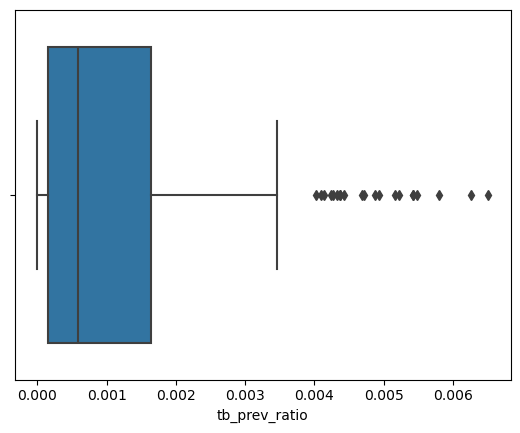

In [25]:
#let's verify visually
sns.boxplot(x=no_outliers['tb_prev_ratio'])
# I"M HERE

<Axes: xlabel='tb_prev_ratio'>

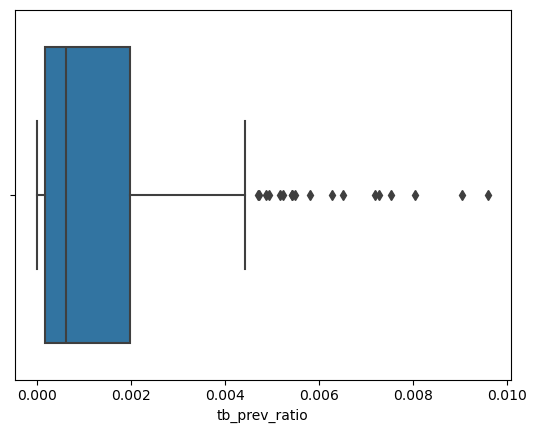

In [26]:
#let's verify visually
sns.boxplot(x=df['tb_prev_ratio'])
# I"M HERE

<Axes: ylabel='Frequency'>

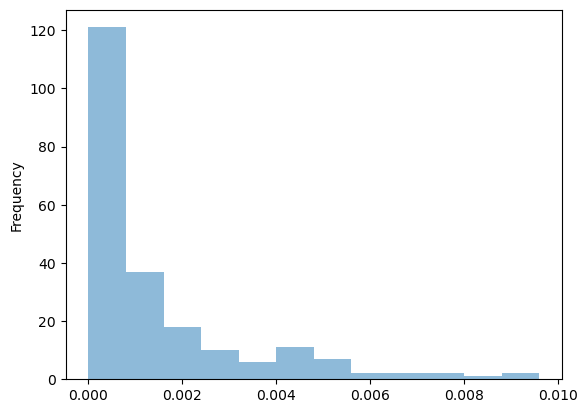

In [27]:
ax = df['tb_prev_ratio'].plot.hist(bins=12, alpha=0.5)
ax

In [29]:
# Let's start on data visualization now (we'll work with no_outliers df)

,level_0,index,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
0,23,23,Afghanistan,AFG,EMR,1970-01-01 00:00:00.000002013,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
1,47,47,Albania,ALB,EUR,1970-01-01 00:00:00.000002013,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
2,71,71,Algeria,DZA,AFR,1970-01-01 00:00:00.000002013,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
3,95,95,American Samoa,ASM,WPR,1970-01-01 00:00:00.000002013,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
4,119,119,Andorra,AND,EUR,1970-01-01 00:00:00.000002013,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,5023,5023,Wallis and Futuna Islands,WLF,WPR,1970-01-01 00:00:00.000002013,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
215,5047,5047,West Bank and Gaza Strip,PSE,EMR,1970-01-01 00:00:00.000002013,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
216,5071,5071,Yemen,YEM,EMR,1970-01-01 00:00:00.000002013,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
217,5095,5095,Zambia,ZMB,AFR,1970-01-01 00:00:00.000002013,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


<Axes: xlabel='tb_prev_ratio', ylabel='tb_death_ratio_to_prev'>

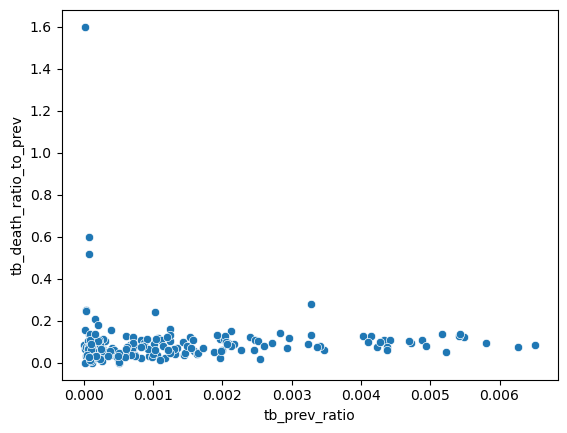

In [28]:
# Is there a higher death rate where there is a much higher tb prevelence?
sns.scatterplot(data=no_outliers, x="tb_prev_ratio", y="tb_death_ratio_to_prev")

In [29]:
# Answer: It looks like there is no correlation between death rate and tb prevelance rate. 
# Let's check another way
death_prev_df = no_outliers[['tb_prev_ratio', 'tb_death_ratio_to_prev']]
death_prev_df

,tb_prev_ratio,tb_death_ratio_to_prev
0,0.003273,0.130000
1,0.000268,0.023529
2,0.001250,0.104082
3,0.000094,0.067308
4,0.000082,0.040000
...,...,...
214,0.000166,0.136364
215,0.000072,0.028710
216,0.000615,0.066000
217,0.003370,0.073469


Text(0.5, 1.0, 'Death to Prevelance Correlation Heatmap')

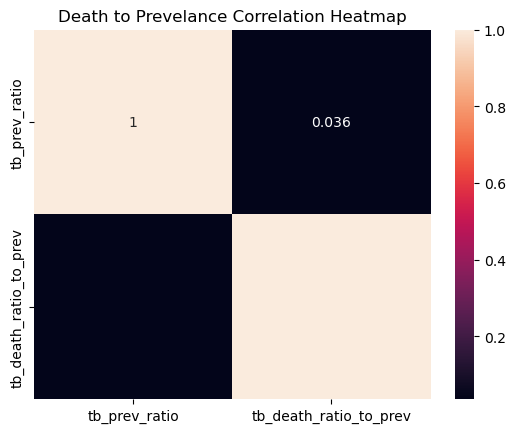

In [30]:
# Correlation heat-map
heatmap = sns.heatmap(death_prev_df.corr(), annot=True)
heatmap.set_title('Death to Prevelance Correlation Heatmap')
# we see very little correlation output in this output

[Text(0, 0.5, '')]

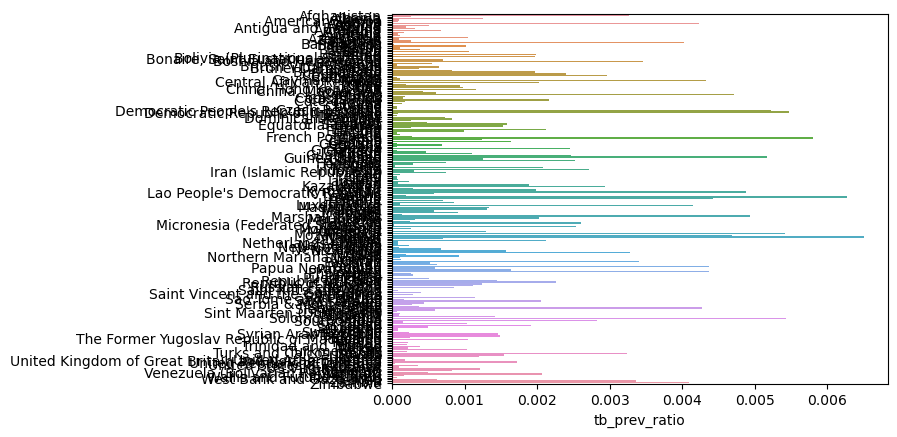

In [31]:
# let us analyze the regions and their prevelance to have TB
ax = sns.barplot(y='country', x='tb_prev_ratio', data=no_outliers)
ax.set(ylabel=None)

In [33]:
# first let's sort our dataset
no_outliers = no_outliers.sort_values(by='tb_prevalence_all_forms', ascending=False)
no_outliers[['country', 'tb_prevalence_all_forms']]

,country,tb_prevalence_all_forms
90,India,2600000.00
42,China,1300000.00
91,Indonesia,680000.00
16,Bangladesh,630000.00
145,Pakistan,620000.00
...,...,...
141,Niue,0.26
22,Bermuda,0.24
194,Tokelau,0.00
127,Montserrat,0.00


In [34]:
# So let's start to group to visually be able to display data
regions_grp_series = no_outliers.groupby('region')['tb_deaths_exc_hiv'].sum()
regions_grp_series.info() # this is now a pandas series --> not dataframe
print(regions_grp_series)

<class 'pandas.core.series.Series'>
Index: 6 entries, AFR to WPR
Series name: tb_deaths_exc_hiv
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 96.0+ bytes
region
AFR    362409.40
AMR     16964.26
EMR     89420.20
EUR     37535.12
SEA    430795.60
WPR     98108.10
Name: tb_deaths_exc_hiv, dtype: float64


In [35]:
#convert series back to df for data visualization
regions_grouped_df = regions_grp_series.to_frame().reset_index()
regions_grouped_df

,region,tb_deaths_exc_hiv
0,AFR,362409.40
1,AMR,16964.26
2,EMR,89420.20
3,EUR,37535.12
4,SEA,430795.60
5,WPR,98108.10


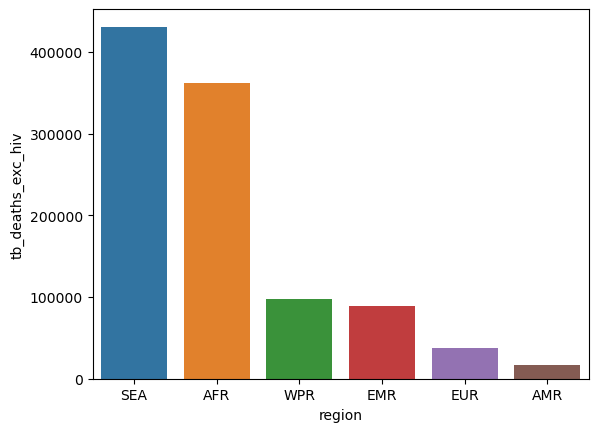

In [36]:
# now let's plot
#first let's sort our data
regions_grouped_df = regions_grouped_df.sort_values(by='tb_deaths_exc_hiv', ascending=False)
death_region_plt = sns.barplot(y='tb_deaths_exc_hiv', x='region', data=regions_grouped_df)
#SEA - south east asia, AFR - africa, AMR - america, EMR - easter mediterranean region, EUR - europe, WPR - Western Pacific Region

In [37]:
# by the way... let's add this back to the original dataframe
no_outliers['regions_grouped_total_deaths'] = no_outliers['region'].map(regions_grp_series)
no_outliers

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev,regions_grouped_total_deaths
90,India,IND,SEA,1970-01-01 00:00:00.000002013,1252139596,2600000.00,240000.00,38000.0,2100000.0,0.002076,0.092308,430795.60
42,China,CHN,WPR,1970-01-01 00:00:00.000002013,1385566537,1300000.00,41000.00,670.0,980000.0,0.000938,0.031538,98108.10
91,Indonesia,IDN,SEA,1970-01-01 00:00:00.000002013,249865631,680000.00,64000.00,3900.0,460000.0,0.002721,0.094118,430795.60
16,Bangladesh,BGD,SEA,1970-01-01 00:00:00.000002013,156594962,630000.00,80000.00,160.0,350000.0,0.004023,0.126984,430795.60
145,Pakistan,PAK,EMR,1970-01-01 00:00:00.000002013,182142594,620000.00,49000.00,970.0,500000.0,0.003404,0.079032,89420.20
...,...,...,...,...,...,...,...,...,...,...,...,...
141,Niue,NIU,WPR,1970-01-01 00:00:00.000002013,1344,0.26,0.01,0.0,0.0,0.000193,0.038462,98108.10
22,Bermuda,BMU,AMR,1970-01-01 00:00:00.000002013,65341,0.24,0.02,0.0,0.0,0.000004,0.083333,16964.26
194,Tokelau,TKL,WPR,1970-01-01 00:00:00.000002013,1195,0.00,0.00,0.0,0.0,0.000000,NaN,98108.10
127,Montserrat,MSR,AMR,1970-01-01 00:00:00.000002013,5091,0.00,1.10,0.0,0.0,0.000000,inf,16964.26


In [40]:
# let's compare actuals with ratio (prevelence to population) to assess magnitude
fig = px.treemap(no_outliers, path=[px.Constant("all"), 'region', 'country', 'tb_death_ratio_to_prev'], values='tb_prev_ratio', hover_data=['tb_prev_ratio'])
fig
#SEA is no longer the leader... more TB in Africa while not as many deaths as in SEA (!!! ADD COUNTRY as nested filter)

In [41]:
#CAUTION: Statistics are messy and data visualizations as well... look at your data
no_outliers.loc[no_outliers['region'] == 'AFR']
#visually there is no .12... it added the entire set of records per region - not right


#regions_grp_series = no_outliers.groupby('region')['tb_deaths_exc_hiv'].sum()
##regions_grp_series.info() # this is now a pandas series --> not dataframe
#print(regions_grp_series)

,country,country_code,region,year,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev,regions_grouped_total_deaths
140,Nigeria,NGA,AFR,1970-01-01 00:00:00.000002013,173615345,570000.0,160000.0,85000.0,590000.0,0.003283,0.280702,362409.4
57,Democratic Republic of the Congo,COD,AFR,1970-01-01 00:00:00.000002013,67513677,370000.0,46000.0,6400.0,220000.0,0.005480,0.124324,362409.4
68,Ethiopia,ETH,AFR,1970-01-01 00:00:00.000002013,94100756,200000.0,30000.0,5600.0,210000.0,0.002125,0.150000,362409.4
129,Mozambique,MOZ,AFR,1970-01-01 00:00:00.000002013,25833752,140000.0,18000.0,38000.0,140000.0,0.005419,0.128571,362409.4
101,Kenya,KEN,AFR,1970-01-01 00:00:00.000002013,44353691,130000.0,9100.0,9500.0,120000.0,0.002931,0.070000,362409.4
113,Madagascar,MDG,AFR,1970-01-01 00:00:00.000002013,22924851,95000.0,12000.0,430.0,53000.0,0.004144,0.126316,362409.4
5,Angola,AGO,AFR,1970-01-01 00:00:00.000002013,21471618,91000.0,6900.0,1600.0,69000.0,0.004238,0.075824,362409.4
206,United Republic of Tanzania,TZA,AFR,1970-01-01 00:00:00.000002013,49253126,85000.0,6000.0,6100.0,81000.0,0.001726,0.070588,362409.4
36,Cameroon,CMR,AFR,1970-01-01 00:00:00.000002013,22253959,66000.0,7800.0,7900.0,52000.0,0.002966,0.118182,362409.4
202,Uganda,UGA,AFR,1970-01-01 00:00:00.000002013,37578876,58000.0,4100.0,7200.0,62000.0,0.001543,0.070690,362409.4


In [42]:
# let's group again but this time while taking the average
regions_grp_series_avg = no_outliers.groupby('region')['tb_prev_ratio'].mean()
regions_grp_series_avg.info() # this is now a pandas series --> not dataframe
print(regions_grp_series_avg)

<class 'pandas.core.series.Series'>
Index: 6 entries, AFR to WPR
Series name: tb_prev_ratio
Non-Null Count  Dtype  
--------------  -----  
6 non-null      float64
dtypes: float64(1)
memory usage: 96.0+ bytes
region
AFR    0.002680
AMR    0.000409
EMR    0.000967
EUR    0.000510
SEA    0.002596
WPR    0.001295
Name: tb_prev_ratio, dtype: float64


In [43]:
#once again convert series back to df for data visualization
regions_grouped_df_avg = regions_grp_series_avg.to_frame().reset_index()
regions_grouped_df_avg

,region,tb_prev_ratio
0,AFR,0.002680
1,AMR,0.000409
2,EMR,0.000967
3,EUR,0.000510
4,SEA,0.002596
5,WPR,0.001295


In [38]:
# let's plot to get better more accurate results --> compare actuals with ratio (prevelence to population) to assess magnitude
fig_2 = px.treemap(regions_grouped_df_avg, path=[px.Constant("all"), 'region'], values='tb_prev_ratio', hover_data=['tb_prev_ratio'])
fig_2

In [ ]:
#note: While in ABSOLUTE number SEA has more TB deaths, both SEA and AFR fair about even in the
#total number of TB prevelence cases. 

In [44]:
df_2 = pd.read_csv('./local_data/TB_Burden_Country.csv')

In [45]:
new_df2 = df_2.loc[(df_2['Region'] == 'SEA') | (df_2['Region'] == 'AFR')]
new_df2

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
48,Algeria,DZ,DZA,12,AFR,1990,26239708,100.0,51.0,166.0,...,0.04,0.03,0.23,11.0,9.0,61.0,NaN,69.0,58.0,83.0
49,Algeria,DZ,DZA,12,AFR,1991,26893663,99.0,51.0,164.0,...,0.05,0.04,0.27,13.0,12.0,73.0,NaN,66.0,57.0,74.0
50,Algeria,DZ,DZA,12,AFR,1992,27535151,100.0,51.0,165.0,...,0.06,0.05,0.32,16.0,15.0,89.0,NaN,64.0,56.0,71.0
51,Algeria,DZ,DZA,12,AFR,1993,28157560,102.0,52.0,170.0,...,0.07,0.07,0.39,19.0,18.0,110.0,NaN,71.0,63.0,80.0
52,Algeria,DZ,DZA,12,AFR,1994,28752749,106.0,54.0,176.0,...,0.08,0.08,0.50,24.0,23.0,140.0,NaN,67.0,58.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,...,511.00,460.00,566.00,66000.0,59000.0,73000.0,NaN,50.0,45.0,54.0
5116,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,...,487.00,433.00,545.00,64000.0,57000.0,71000.0,NaN,53.0,48.0,59.0
5117,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,...,448.00,403.00,502.00,60000.0,54000.0,67000.0,NaN,48.0,43.0,53.0
5118,Zimbabwe,ZW,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,...,411.00,362.00,471.00,56000.0,50000.0,65000.0,NaN,45.0,40.0,52.0


In [43]:
#new_df2 = new_df2[columns_keep]
#print(new_df2.shape)

new_df2.rename(columns=col_mapping, inplace=True)
new_df2

/var/folders/bg/npdy939j01xfcxncr1f4gps80000gn/T/ipykernel_76417/3291266480.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,country_code,region,year,population,tb_prevalence_all_forms,prevalence_method,tb_deaths_exc_hiv,tb_death_hiv,mortality_method,num_incidents_all_forms
48,Algeria,DZA,AFR,1990,26239708,26000.0,predicted,2800.0,3.0,Indirect,17000.0
49,Algeria,DZA,AFR,1991,26893663,27000.0,predicted,2700.0,4.0,Indirect,17000.0
50,Algeria,DZA,AFR,1992,27535151,27000.0,predicted,2800.0,5.0,Indirect,18000.0
51,Algeria,DZA,AFR,1993,28157560,29000.0,predicted,2900.0,6.0,Indirect,19000.0
52,Algeria,DZA,AFR,1994,28752749,31000.0,predicted,3100.0,7.0,Indirect,20000.0
...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,AFR,2009,12888918,58000.0,predicted,5000.0,27000.0,Indirect,87000.0
5116,Zimbabwe,ZWE,AFR,2010,13076978,54000.0,predicted,4700.0,26000.0,Indirect,83000.0
5117,Zimbabwe,ZWE,AFR,2011,13358738,56000.0,predicted,5100.0,24000.0,Indirect,80000.0
5118,Zimbabwe,ZWE,AFR,2012,13724317,58000.0,predicted,5600.0,22000.0,Indirect,79000.0


In [46]:
### Create new columns for comparative analysis
new_df2['tb_prev_ratio'] = new_df2['tb_prevalence_all_forms'].div(new_df2['population'], axis=0)
new_df2['tb_death_ratio_to_prev'] = new_df2['tb_deaths_exc_hiv'].div(new_df2['tb_prevalence_all_forms'], axis=0)
new_df2

KeyError: 'tb_prevalence_all_forms'

In [ ]:
sns.lineplot(data=new_df2, x='year', y='tb_death_ratio_to_prev', label='line1')

In [62]:
# First create new dataframe with numeric values only
df_numeric = df.select_dtypes(include='number')
df_numeric

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
47,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
71,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
95,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
119,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...
5023,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
5047,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
5071,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
5095,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


In [65]:
#Let us normalize the data first (put the data between -1 and 1 for easier comparative purposes)

df_numeric_normalized = df_numeric.copy()
for column in df_numeric_normalized.columns:
    df_numeric_normalized[column] = df_numeric_normalized[column] / df_numeric_normalized[column].abs().max()
df_numeric_normalized

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,0.022050,3.846154e-02,0.054167,0.000965,2.761905e-02,0.340820,0.0
47,0.002290,3.269231e-04,0.000083,0.000000,2.809524e-04,0.027891,0.0
71,0.028298,1.884615e-02,0.021250,0.000412,1.523810e-02,0.130131,0.0
95,0.000040,2.000000e-06,0.000001,0.000000,1.904762e-06,0.009815,0.0
119,0.000057,2.500000e-06,0.000001,0.000000,2.761905e-06,0.008544,0.0
...,...,...,...,...,...,...,...
5023,0.000010,8.461538e-07,0.000001,0.000000,5.714286e-07,0.017260,0.0
5047,0.003122,1.192308e-04,0.000037,0.000007,9.523810e-05,0.007461,0.0
5071,0.017615,5.769231e-03,0.004125,0.000212,5.714286e-03,0.063993,0.0
5095,0.010493,1.884615e-02,0.015000,0.101176,2.857143e-02,0.350939,0.0


<Axes: xlabel='tb_prev_ratio'>

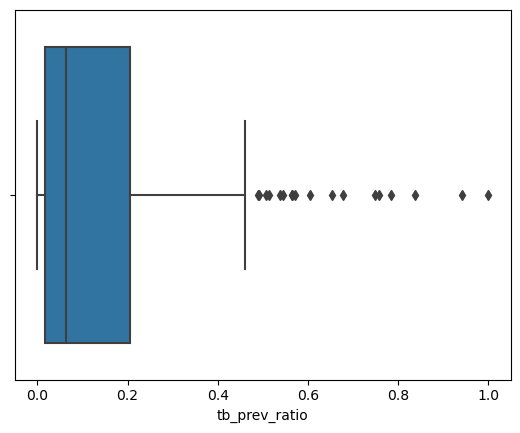

In [66]:
#let's verify visually again with scaled values
sns.boxplot(x=df_numeric_normalized['tb_prev_ratio'])

In [67]:
# here are the outliers in TB_PREV_RATIO (Turberculosis Prevelance Ratio - if any)
tb_prev_ratio_outliers = outliers_zscore(df_numeric_normalized, 'tb_prev_ratio')
tb_prev_ratio_outliers

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev


In [72]:
from scipy import stats
df_numeric

,population,tb_prevalence_all_forms,tb_deaths_exc_hiv,tb_death_hiv,num_incidents_all_forms,tb_prev_ratio,tb_death_ratio_to_prev
23,30551674,100000.0,13000.00,82.00,58000.0,0.003273,0.130000
47,3173271,850.0,20.00,0.00,590.0,0.000268,0.023529
71,39208194,49000.0,5100.00,35.00,32000.0,0.001250,0.104082
95,55165,5.2,0.35,0.00,4.0,0.000094,0.067308
119,79218,6.5,0.26,0.00,5.8,0.000082,0.040000
...,...,...,...,...,...,...,...
5023,13272,2.2,0.30,0.00,1.2,0.000166,0.136364
5047,4326295,310.0,8.90,0.56,200.0,0.000072,0.028710
5071,24407381,15000.0,990.00,18.00,12000.0,0.000615,0.066000
5095,14538640,49000.0,3600.00,8600.00,60000.0,0.003370,0.073469


In [73]:
z = np.abs(stats.zscore(df_numeric['tb_prev_ratio']))
z

23      1.006485
47      0.610925
71      0.082489
95      0.704354
119     0.710926
          ...   
5023    0.665874
5047    0.716522
5071    0.424331
5095    1.058790
5119    1.450975
Name: tb_prev_ratio, Length: 219, dtype: float64

In [76]:
threshold = 3
outlier_indices = np.where(z > threshold)[0]
no_outliers = df_numeric.drop(outlier_indices, axis=1)
print('original dataframe shape: ', df_numeric.shape)
print('dataframe after removal of outliers: ', no_outliers.shape)

KeyError: '[35, 59, 102, 179, 185, 192] not found in axis'